In [215]:
import pypsa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date
%matplotlib inline
plt.rc("figure", figsize=(8, 8))

Text(0.5, 0, 'Time Stamp')

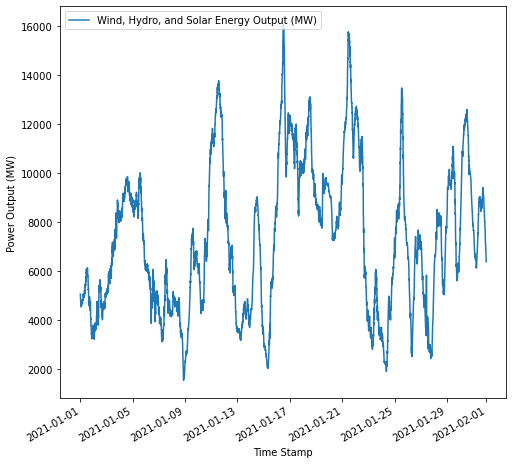

In [216]:
from cProfile import label


df = pd.read_csv (r'/home/jason/storage-diss/gridwatch.csv', index_col=1, parse_dates=True ) #year of 2021
del df['id']
#df.plot()
df = df.sum(axis = 1)
df['2021-1-01':'2021-1-31'].plot(label='Wind, Hydro, and Solar Energy Output (MW)')
plt.legend(loc="upper left")
plt.ylabel('Power Output (MW)')
plt.xlabel('Time Stamp')

Text(0.5, 0, 'Time Stamp')

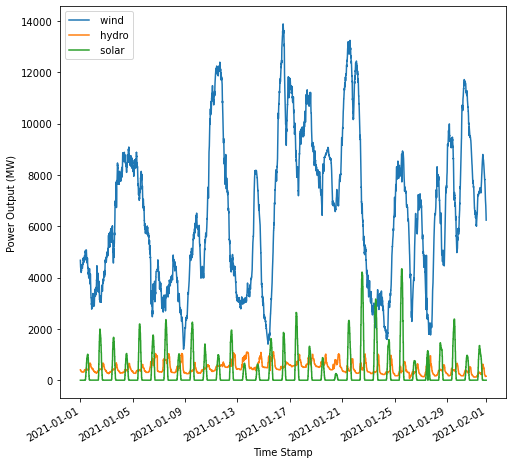

In [234]:
df = pd.read_csv (r'/home/jason/storage-diss/gridwatch.csv', index_col=1, parse_dates=True ) #year of 2021
del df['id']
#df.plot()
#df = df.sum(axis = 1)
df['2021-1-01':'2021-1-31'].plot(label= 'Power Demand (MW)')
plt.legend(loc="upper left")
plt.ylabel('Power Output (MW)')
plt.xlabel('Time Stamp')

In [218]:
i = df.max()
i

 demand    47107
dtype: int64

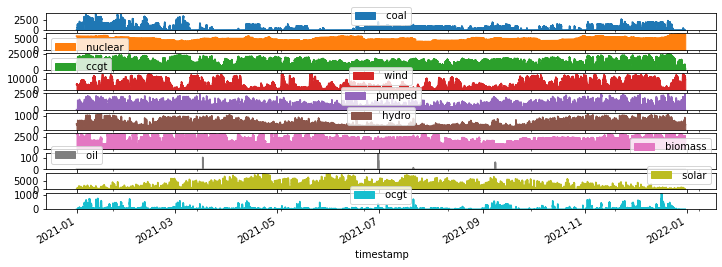

In [219]:
df = pd.read_csv (r'/home/jason/storage-diss/2021supply.csv', index_col=1, parse_dates=True ) #year of 2021
del df['id']
axs = df.plot.area(figsize=(12, 4), subplots=True)

In [220]:
network = pypsa.Network()

In [221]:
network.snapshots = i = pd.date_range("2021-01-01 00:00", "2021-01-31 23:00", freq="0.08333333333333333333H")

network.snapshots


DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:05:00',
               '2021-01-01 00:10:00', '2021-01-01 00:15:00',
               '2021-01-01 00:20:00', '2021-01-01 00:25:00',
               '2021-01-01 00:30:00', '2021-01-01 00:35:00',
               '2021-01-01 00:40:00', '2021-01-01 00:45:00',
               ...
               '2021-01-31 22:15:00', '2021-01-31 22:20:00',
               '2021-01-31 22:25:00', '2021-01-31 22:30:00',
               '2021-01-31 22:35:00', '2021-01-31 22:40:00',
               '2021-01-31 22:45:00', '2021-01-31 22:50:00',
               '2021-01-31 22:55:00', '2021-01-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8917, freq='5T')

In [222]:
network.add('Bus',"London", v_nom=380)
network.add("Bus", "HydrogenStore", carrier="H2")

<AxesSubplot:xlabel=' timestamp'>

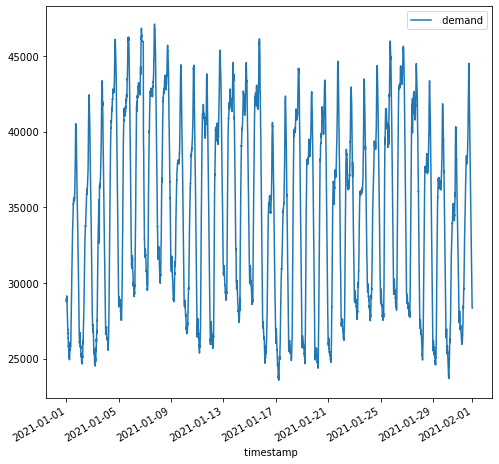

In [223]:
df1 = pd.read_csv (r'/home/jason/storage-diss/2021demand.csv', index_col=1, parse_dates=True ) #year of 2021
del df1['id']

array = df1["2021-01-01 00:00": "2021-01-31 23:24"].values

array1 = np.empty(len(array))

for i in range(len(array1)):
    array1[i] = array[i][0]

df1['2021-1-01':'2021-1-31'].plot()

#array1
#np.array(df1["2021-01-01 00:00": "2021-01-31 23:24"])

In [224]:
df1['2021-1-01':'2021-1-31'].max().values

array([47105])

In [225]:
#Demand

network.add(
  "Load",
  name= 'LondonDemand',
  bus='London',
  p_set= array1  #MW active power set point
)

Text(0.5, 0, 'Time Stamp')

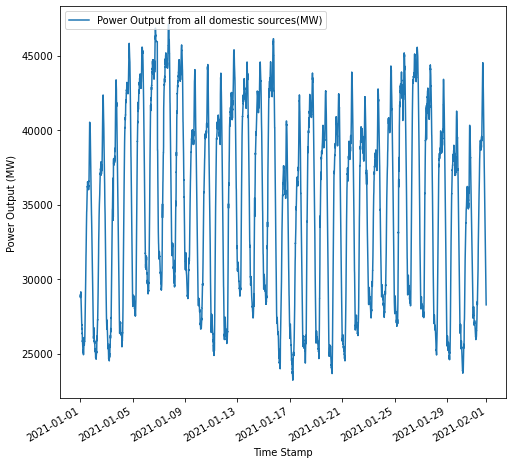

In [226]:

df = pd.read_csv (r'/home/jason/storage-diss/intercon.csv', index_col=1, parse_dates=True ) #year of 2021
del df['id']
#df.plot()
df = df.sum(axis = 1)
df['2021-1-01':'2021-1-31'].plot(label='Power Output from all domestic sources(MW)')
plt.legend(loc="upper left")
plt.ylabel('Power Output (MW)')
plt.xlabel('Time Stamp')

In [227]:
df = pd.read_csv (r'/home/jason/storage-diss/intercon.csv', index_col=1, parse_dates=True ) #year of 2021
del df['id']
#df.plot()
df = df.sum(axis = 1)

df1["2021-01-01 00:00": "2021-01-31 23:24"].values.max()

47105

In [228]:
df = pd.read_csv (r'/home/jason/storage-diss/intercon.csv', index_col=1, parse_dates=True ) #year of 2021
del df['id']
#df.plot()
df = df.sum(axis = 1)

network.add(
    'Generator',
    name= 'TotalGenerator',
    bus= 'London',
    p_nom= 48000,#MW nominal power
    p_max_pu= df["2021-01-01 00:00": "2021-01-31 23:24"].values / df["2021-01-01 00:00": "2021-01-31 23:24"].values.max(),
    #p_max_pu= df["2021-01-01 00:00": "2021-01-31 23:24"].values,
    #p_max_pu= , proportion of 
    capital_cost= 1600000, #currency/MWh
    efficiency=1,
    marginal_cost=95, #currency/MWh
    carrier='AC'
    )

df["2021-01-01 00:00": "2021-01-31 23:24"].values
#network.generators_t.p_set.plot()
#plt.tight_layout()

array([28857.06, 28762.  , 28859.  , ..., 29723.  , 29473.  , 29363.  ])

In [229]:
df['2021-1-01':'2021-1-31'].values.max()


47105.576

In [230]:



#Generation to storage, Electrolysers
network.add(
  "Link",
  "Electrolyser",
  bus0="London",
  bus1="HydrogenStore",
  capital_cost=350000, #currency/MWh
  p_nom_extendable=True, #Switch to allow capacity p_nom to be extended 
  efficiency=0.8,
)

#H2 to London, Fue Cells
network.add(
  "Link",
  "Fuel Cell",
  bus0="HydrogenStore",
  bus1="London",
  capital_cost=339000,
  p_nom_extendable=True,
  efficiency=0.58,
)

#Storage
network.add(
  "Store",
  "Hydrogen Storage",
  bus="HydrogenStore",
  capital_cost=11200,
  marginal_cost=25, #currency/MWh
  e_nom_extendable=True,
  e_cyclic=True, #True, then e_initial is ignored and the initial energy is set to the final energy for the group of snapshots in the OPF.
)


In [231]:
network.lopf()

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using glpk
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 32034484277.3539
  Upper bound: 32034484277.3539
  Number of objectives: 1
  Number of constraints: 80254
  Number of variables: 44589
  Number of nonzeros: 160507
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 33.28087329864502
# ----------------------------------------------------------
#   Solution Information
# ----

/home/jason/anaconda3/lib/python3.9/site-packages/pypsa/opf.py:1293: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat({c.name:


(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

In [232]:
network.objective / 10**9

32.034484277353904

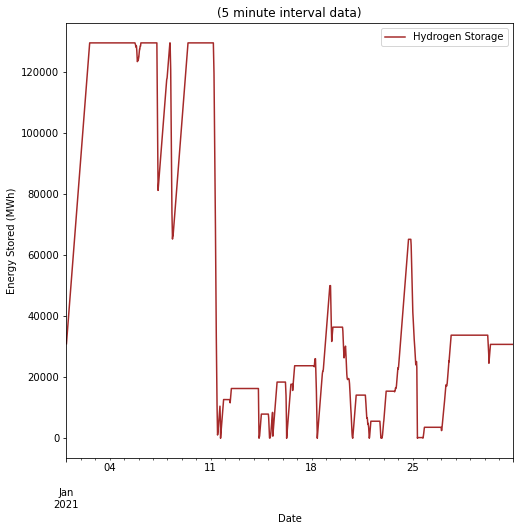

In [233]:
import matplotlib.pyplot as plt


network.stores_t.e.plot(color="brown")
plt.xlabel("Date")
plt.ylabel("Energy Stored (MWh)")
plt.title("(5 minute interval data)")
plt.legend()